

# STEP 0: Set up

To get started on this notebook, you’ll need to restore any variables
from previous notebooks to your workspace. To save time and memory, make
sure to specify which variables you want to load.

In [1]:
# Restore variables for this notebook
%store -r 

You will also need to import any libraries you are using in this
notebook, since they won’t carry over from the previous notebook:

In [2]:
# Import library for interactive plotting with vector data
import hvplot.pandas

# Import library for interactive plotting with raster data
import hvplot.xarray

# Import library for plotting
import matplotlib.pyplot as plt

# Import library for working with raster data
import rioxarray as rxr

# Import library for working with raster data arrays
import xarray as xr

In [3]:
# Call ndvi_paths to look at data
ndvi_paths 

[PosixPath('/workspaces/data/gila-river-vegetation-directory/gila-river-ndvi/MOD13Q1.061_2001137_to_2022244/MOD13Q1.061__250m_16_days_NDVI_doy2001145000000_aid0001.tif'),
 PosixPath('/workspaces/data/gila-river-vegetation-directory/gila-river-ndvi/MOD13Q1.061_2001137_to_2022244/MOD13Q1.061__250m_16_days_NDVI_doy2001161000000_aid0001.tif'),
 PosixPath('/workspaces/data/gila-river-vegetation-directory/gila-river-ndvi/MOD13Q1.061_2001137_to_2022244/MOD13Q1.061__250m_16_days_NDVI_doy2001177000000_aid0001.tif'),
 PosixPath('/workspaces/data/gila-river-vegetation-directory/gila-river-ndvi/MOD13Q1.061_2001137_to_2022244/MOD13Q1.061__250m_16_days_NDVI_doy2001193000000_aid0001.tif'),
 PosixPath('/workspaces/data/gila-river-vegetation-directory/gila-river-ndvi/MOD13Q1.061_2001137_to_2022244/MOD13Q1.061__250m_16_days_NDVI_doy2001209000000_aid0001.tif'),
 PosixPath('/workspaces/data/gila-river-vegetation-directory/gila-river-ndvi/MOD13Q1.061_2001137_to_2022244/MOD13Q1.061__250m_16_days_NDVI_doy200

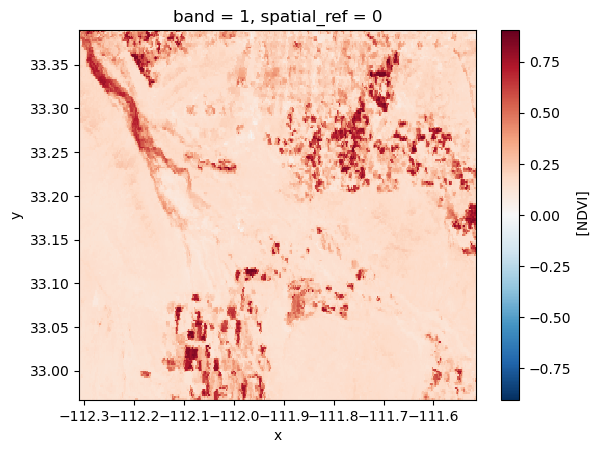

In [4]:
# Plot the first tif image file
rxr.open_rasterio(ndvi_paths[0], mask_and_scale=True).squeeze().plot()


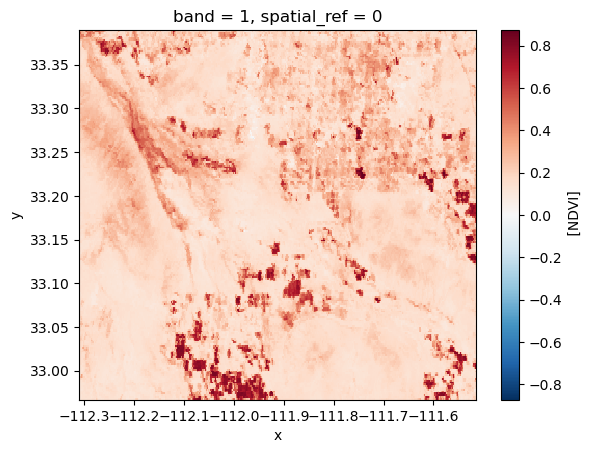

In [5]:
# Plot the last tif image file
rxr.open_rasterio(ndvi_paths[-1], mask_and_scale=True).squeeze().plot()

Text(0.5, 1.0, 'NDVI - Gila River 2022')

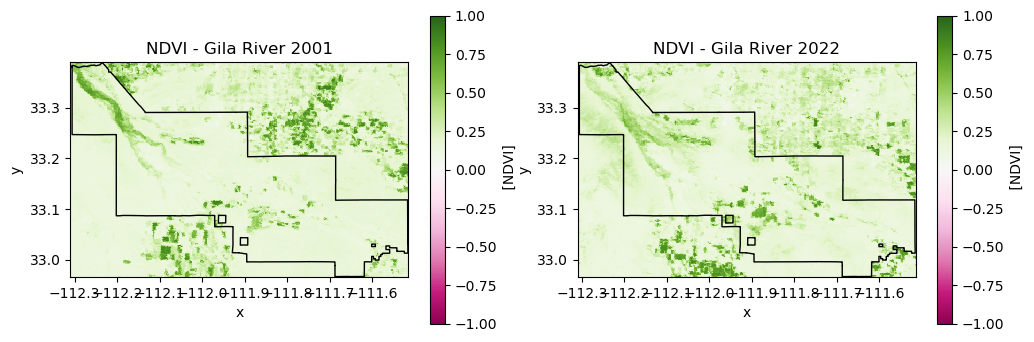

In [ ]:
# Create variables for each raster to create side-by-side for comparison
recent_ndvi = rxr.open_rasterio(ndvi_paths[-1], mask_and_scale=True).squeeze()
old_ndvi = rxr.open_rasterio(ndvi_paths[0], mask_and_scale=True).squeeze()

# Create and plot side-by-side subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

# Plot first 2001 image on left
old_ndvi.plot(ax=axes[0], cmap=plt.cm.PiYG, vmin=-1, vmax=1)
# Add boundary from AITSN geodataframe
gric_boundary_gdf.plot(ax=axes[0], 
                  edgecolor='black', 
                  facecolor='none', # No fill
                  linewidth=1
)
# Add title
axes[0].set_title("NDVI - Gila River 2001")

# Plot most recent 2022 image on right
recent_ndvi.plot(ax=axes[1], cmap=plt.cm.PiYG, vmin=-1, vmax=1)

# Add boundary from AITSN geodataframe
gric_boundary_gdf.plot(ax=axes[1], 
                  edgecolor='black', 
                  facecolor='none', 
                  linewidth=1
)

# Add title
axes[1].set_title("NDVI - Gila River 2022")

# STEP 3: Plot NDVI

<link rel="stylesheet" type="text/css" href="./assets/styles.css"><div class="callout callout-style-default callout-titled callout-task"><div class="callout-header"><div class="callout-icon-container"><i class="callout-icon"></i></div><div class="callout-title-container flex-fill">Try It: Plot the change in NDVI spatially</div></div><div class="callout-body-container callout-body"><p>Complete the following:</p>
<ul>
<li>Select data from 2021 to 2023 (3 years after the <span
data-__quarto_custom="true" data-__quarto_custom_type="Shortcode"
data-__quarto_custom_context="Inline"
data-__quarto_custom_id="1"></span>)</li>
<li>Take the temporal mean (over the <strong>date</strong>, not
spatially)</li>
<li>Get the NDVI variable (should be a DataArray, not a Dataset)</li>
<li>Repeat for the data from 2018 to 2020 (3 years before the <span
data-__quarto_custom="true" data-__quarto_custom_type="Shortcode"
data-__quarto_custom_context="Inline"
data-__quarto_custom_id="2"></span>)</li>
<li>Subtract the 2018-2020 time period <strong>from</strong> the
2021-2023 time period</li>
<li>Plot the result using a <strong>diverging</strong> color map like
<code>cmap=plt.cm.PiYG</code></li>
</ul>
<p>There are different types of color maps for different types of data.
In this case, we want decreases to be a different color from increases,
so we should use a <strong>diverging</strong> color map. Check out
available colormaps in the <a
href="https://matplotlib.org/stable/tutorials/colors/colormaps.html">matplotlib
documentation</a>.</p></div></div>

<link rel="stylesheet" type="text/css" href="./assets/styles.css"><div class="callout callout-style-default callout-titled callout-extra"><div class="callout-header"><div class="callout-icon-container"><i class="callout-icon"></i></div><div class="callout-title-container flex-fill">Looking for an Extra Challenge?</div></div><div class="callout-body-container callout-body"><p>For an extra challenge, add the <span data-__quarto_custom="true"
data-__quarto_custom_type="Shortcode"
data-__quarto_custom_context="Inline"
data-__quarto_custom_id="3"></span> boundary to the plot.</p></div></div>

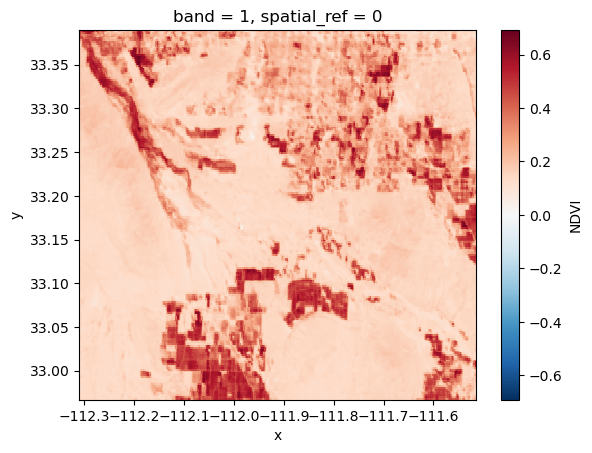

In [7]:
# Calculate the mean of 2001 to 2011 NDVI data
mean_ndvi_2001_2011 = ndvi_da.sel(date=slice('2001', '2011')).mean('date').NDVI

# Plot the mean to check and view the data 
mean_ndvi_2001_2011.plot()

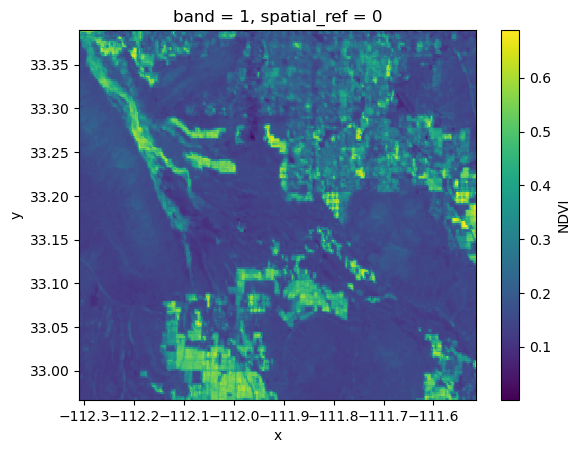

In [8]:
# Calculate the mean of 2012 to 2022 NDVI data
mean_ndvi_2012_2022 = ndvi_da.sel(date=slice('2012', '2022')).mean('date').NDVI

# Plot the mean to check and view the data 
mean_ndvi_2012_2022.plot()

In [9]:
# Compute the difference in NDVI before and after the return of water rights
ndvi_diff =(
    ndvi_da
        .sel(date=slice('2012', '2022')) # Date range
            .mean('date') # Calculate mean of date
            .NDVI # Use NDVI data
    - ndvi_da
        .sel(date=slice('2001', '2011'))
            .mean('date')
            .NDVI
)

# Call the NDVI data
ndvi_diff

<xarray.DataArray 'NDVI' (y: 203, x: 382)> Size: 310kB
array([[-0.05567682, -0.0292117 ,  0.00586349, ...,  0.01543377,
         0.01543377,  0.00927271],
       [-0.07940263, -0.03390124, -0.02959213, ...,  0.01815718,
         0.01815718,  0.0177182 ],
       [-0.17723629, -0.08530393,  0.01360923, ...,  0.01517531,
         0.00823637,  0.01195324],
       ...,
       [-0.0115844 , -0.0115844 , -0.00991558, ..., -0.00157142,
        -0.00157142,  0.00205326],
       [-0.01115062, -0.01115062, -0.00994415, ...,  0.00598571,
         0.00598571, -0.00095583],
       [-0.00930774, -0.00849222, -0.01209998, ..., -0.0296714 ,
        -0.02090381, -0.03258313]], shape=(203, 382), dtype=float32)
Coordinates:
    band         int64 8B 1
  * x            (x) float64 3kB -112.3 -112.3 -112.3 ... -111.5 -111.5 -111.5
  * y            (y) float64 2kB 33.39 33.39 33.38 33.38 ... 32.97 32.97 32.97
    spatial_ref  int64 8B 0

In [10]:
# Plot the difference
(
   ndvi_diff
   .hvplot(
       x='x', 
       y='y',
       title='NDVI Changes at Gila River Indian Community\n(2001-2011) vs.(2012-2022)',
       cmap='PiYG', 
       geo=True)
   *
   gric_boundary_gdf.hvplot(geo=True, fill_color=None, line_color='black')
)

:Overlay
   .Image.I    :Image   [x,y]   (NDVI)
   .Polygons.I :Polygons   [Longitude,Latitude]

# STEP -1: Wrap up

Don’t forget to store your variables so you can use them in other
notebooks! Replace `var1` and `var2` with the variable you want to save,
separated by spaces.

In [ ]:
# Store variables for future use
%store ndvi_diff

Stored 'ndvi_diff' (DataArray)


Finally, be sure to `Restart` and `Run all` to make sure your notebook
works all the way through!